# Práctica 06: Análisis de Datos caso Salario de Especialistas en Inteligencia Artificial y Machine Learning


#### Creado por: Esperanza Cruz Galindo M - 220262

#### Asignatura: Extracción de Conocimiento en Base de Datos

#### PE: Ingeniería en Desarrollo y Gestión de Software -9°B

In [5]:
# Carga de Paquetes y Librerías a utilizar

#Básicos (Standard)
import requests
import http.client
import json
from scipy.stats import skew, kurtosis, mode
import numpy as np # sirve para realizar procesamientos básicos númericos en datos cuantitativos
import pandas as pd #sirve para realizar los procesos ETL en un conjunto de datos
import time  #sirve para la manipulación de datos en diferentes formatos de tiempo
import os # Permite la ejecución de comandos a niverl sistema operativo
#Graficadores (Plots)
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pymongo import MongoClient

# 1. Importar el origen de los datos

#### 1.1 Nos aseguramos que el archivo de origen de datos se encuentre en la carpeta del proyecto

In [12]:
!cd 
!dir

C:\Users\Hp\Documents\ECBD\Practica 06
 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 64AB-76B1

 Directorio de C:\Users\Hp\Documents\ECBD\Practica 06

16/06/2025  11:58 a. m.    <DIR>          .
16/06/2025  11:57 a. m.    <DIR>          ..
16/06/2025  11:58 a. m.    <DIR>          .ipynb_checkpoints
16/06/2025  11:57 a. m.               557 .Untitled.ipynb.layout
16/06/2025  11:57 a. m.           741,735 Practica06.ipynb
16/06/2025  11:58 a. m.         4,127,519 salaries.csv
               3 archivos      4,869,811 bytes
               3 dirs  381,042,266,112 bytes libres


#### 1.2 Importamos los datos en un nueva

In [27]:
df= pd.read_csv('salaries.csv')

#### 1.3 Corroboramos el tipo de dato de nuestro objeto

In [19]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73152 non-null  float64
 1   experience_level    73152 non-null  object 
 2   employment_type     73153 non-null  object 
 3   job_title           73151 non-null  object 
 4   salary              73149 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73148 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73148 non-null  object 
 10  company_size        73149 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


# 2. Revisar la importaciòn de los Datos y conocer su composiciòn de la muestra.

#### 2.1 Utilizamos comandos para conocer  las dimensiones del Data Frame

In [10]:
df.size ## Devuelve el total de datos que contiene el DataFrame

804683

In [11]:
print(len(df)) ##Devuelve el total de tuplas o registros, iteraciones del DataFrame

73153


## Consultas basicas sobre el DataFrame

In [12]:
print(df.head) ##Devuelve los primeros y ultimos 5 registros o tuplas del DataFrame

<bound method NDFrame.head of        work_year experience_level employment_type              job_title  \
0           2025               SE              FT     Data Product Owner   
1           2025               SE              FT     Data Product Owner   
2           2025               SE              FT     Data Product Owner   
3           2025               SE              FT     Data Product Owner   
4           2025               SE              FT               Engineer   
...          ...              ...             ...                    ...   
73148       2020               EN              CT  Business Data Analyst   
73149       2021               SE              FT         Data Scientist   
73150       2021               SE              FT         Data Scientist   
73151       2022               SE              FT         Data Scientist   
73152       2023               SE              FT         Data Scientist   

          salary salary_currency  salary_in_usd employee_

In [13]:
df.tail() ## Devuelve los ultimos datos DataFrame , si no se especifica cuantos automaticamente devulve los ùltimos 5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73148,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73149,2021,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L
73150,2021,SE,FT,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73151,2022,SE,FT,Data Scientist,NaN,NaN,676778.0,NaN,50.0,NaN,L
73152,2023,SE,FT,Data Scientist,555.0,NaN,787878.0,NaN,NaN,NaN,NaN


In [14]:
df.describe() ## Realiza un reporte estadìstico sobre columnas completamente numericas(cuantitativas)

,work_year,salary,salary_in_usd,remote_ratio
count,73153.000000,7.314900e+04,73150.000000,73149.000000
mean,2023.831135,1.625512e+05,158029.450991,21.583344
std,0.477727,1.925757e+05,72563.060931,41.022906
min,2020.000000,5.550000e+02,15000.000000,0.000000
25%,2024.000000,1.069500e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


#### 2.2 Busqueda de datos nulos

In [15]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73148,False,False,False,False,False,False,False,False,False,False,False
73149,False,False,False,False,False,False,False,False,False,False,False
73150,False,False,False,False,True,True,True,True,True,True,True
73151,False,False,False,False,True,True,False,True,False,True,False


In [17]:
df.notnull()  ## Realiza un mapeo de la matriz original colocando valores booleanos de a cuerdo a la condición de si es nulo

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73148,True,True,True,True,True,True,True,True,True,True,True
73149,True,True,True,True,True,True,True,True,True,True,True
73150,True,True,True,True,False,False,False,False,False,False,False
73151,True,True,True,True,False,False,True,False,True,False,True


# 3. Transformar los Datos para su Análisis

#### 3.1. Eliminando datos duplicados

In [76]:
df_duplicados_eliminados = df.drop_duplicates() ##Este método elimina los datos duplicados en base al criterio de la totalidad de los datos, esto se debe realizar con extrema 
#                    cautela dado que si no se tiene un atributo identificador se alterán resultados esperados

In [78]:
df_duplicados_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34024 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           34024 non-null  int64 
 1   experience_level    34024 non-null  object
 2   employment_type     34024 non-null  object
 3   job_title           34024 non-null  object
 4   salary              34024 non-null  int64 
 5   salary_currency     34024 non-null  object
 6   salary_in_usd       34024 non-null  int64 
 7   employee_residence  34024 non-null  object
 8   remote_ratio        34024 non-null  int64 
 9   company_location    34024 non-null  object
 10  company_size        34024 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


#### 3.2. Eliminar filas vacias o nulas

In [7]:
df_vacios_eliminados = df.dropna()

In [8]:
df_vacios_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73147 entries, 0 to 73149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73147 non-null  float64
 1   experience_level    73147 non-null  object 
 2   employment_type     73147 non-null  object 
 3   job_title           73147 non-null  object 
 4   salary              73147 non-null  float64
 5   salary_currency     73147 non-null  object 
 6   salary_in_usd       73147 non-null  float64
 7   employee_residence  73147 non-null  object 
 8   remote_ratio        73147 non-null  float64
 9   company_location    73147 non-null  object 
 10  company_size        73147 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.7+ MB


#### 3.3 Eliminar los registros que no cuenten de manera obligatoria con los salarios

In [144]:
df_eliminar_sin_salario = df.dropna(subset=['salary_in_usd'])

In [146]:
df_eliminar_sin_salario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73150 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73150 non-null  int64  
 1   experience_level    73150 non-null  object 
 2   employment_type     73150 non-null  object 
 3   job_title           73150 non-null  object 
 4   salary              73149 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73148 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73148 non-null  object 
 10  company_size        73149 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.7+ MB


In [204]:
print("DataFrame Original:")
print(len(df))
print("DataFrame sin datos de cualquier columna")
print(len(df_vacios_eliminados))
print("DataFrame sin datos de la columna salario")
print(len(df_eliminar_sin_salario))

DataFrame Original:
73153
DataFrame sin datos de cualquier columna
73148
DataFrame sin datos de la columna salario
73150


#### 3.4 Reemplazar los valores nulos con un valor especifico

In [33]:
df_valoresNulosSustituido = df.fillna(value='N/A')

#### 3.5 Verificamos nuevos datos

In [34]:
df_valoresNulosSustituido

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73148,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73149,2021.0,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L
73150,2021.0,SE,FT,Data Scientist,N/A,N/A,N/A,N/A,N/A,N/A,N/A
73151,2022.0,SE,FT,Data Scientist,N/A,N/A,676778.0,N/A,50.0,N/A,L


#### 3.6 Verificamos la estructura del nuevo DataFrame

In [35]:
df_valoresNulosSustituido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73153 non-null  object
 1   experience_level    73153 non-null  object
 2   employment_type     73153 non-null  object
 3   job_title           73153 non-null  object
 4   salary              73153 non-null  object
 5   salary_currency     73153 non-null  object
 6   salary_in_usd       73153 non-null  object
 7   employee_residence  73153 non-null  object
 8   remote_ratio        73153 non-null  object
 9   company_location    73153 non-null  object
 10  company_size        73153 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


#### 3.7 Lo comparamos con el original

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73153 non-null  int64  
 1   experience_level    73153 non-null  object 
 2   employment_type     73153 non-null  object 
 3   job_title           73151 non-null  object 
 4   salary              73149 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73148 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73148 non-null  object 
 10  company_size        73149 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.1+ MB


#### 3.8 ¿Qué pasaria si con el nuevo DataFrame ejecutamos describe()?

In [36]:
df_valoresNulosSustituido.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73153.0,73153,73153,73153,73153.0,73153,73153.0,73153,73153.0,73153,73153
unique,7.0,4,4,290,7096.0,26,7705.0,94,4.0,87,4
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62229.0,42929,72813,11446,1437.0,69418,1426.0,65982,57220.0,66035,70536


#### 3.9 Sustituir valores nulos de columnas específicas , con un valor especifico(salary_in_USD) por 0.0

In [37]:
df_SalariosNulosSustituidos = df.fillna({'salary':0.0,'salary_in_usd':0.0})

#### 3.1.0 Corroboramos la situación

In [38]:
df_SalariosNulosSustituidos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73148,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73149,2021.0,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L
73150,2021.0,SE,FT,Data Scientist,0.0,NaN,0.0,NaN,NaN,NaN,NaN
73151,2022.0,SE,FT,Data Scientist,0.0,NaN,676778.0,NaN,50.0,NaN,L


#### 3.1.1 Si realizamos el resumen estadistico aún ahi datos estadisticos

In [41]:
df_SalariosNulosSustituidos.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73152.000000,7.315300e+04,73153.000000,73149.000000
mean,2023.831119,1.625423e+05,158022.970213,21.583344
std,0.477711,1.925742e+05,72568.629592,41.022906
min,2020.000000,0.000000e+00,0.000000,0.000000
25%,2024.000000,1.069000e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


#### 3.1.2 Limpieza de datos con valor erróneo
Para ejemplificar este tipo de limpieza de datos, tomaremos en consideración la columna: 'experience_level' cuyos valores de registro son

In [50]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX', 'MX', nan], dtype=object)

#### 3.1.3 Totales por categoria 

In [53]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42927
MI     21853
EN      6877
EX      1494
MX         1
NaN        1
Name: count, dtype: int64

#### 3.1.3 Borrar la categoria MX y EC de la columna experience_level

In [9]:
df_filtrado = df[df['experience_level'].isin(['SE', 'MI', 'EN', 'EX'])]

In [13]:
df_filtrado['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

# 4. Graficación Básica de Datos 

#### 4.1 Histograma básico del dataframe

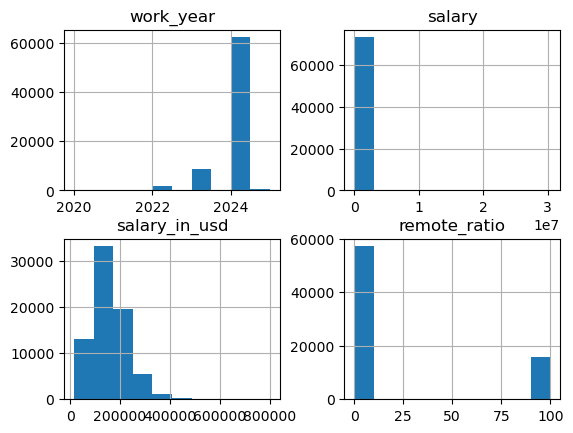

In [12]:
## Comando básico de graficación de datos, el cuál sin parámetros tomará cada columna  numérica (cuantitativa) y mostrara su conteo
df.hist();

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

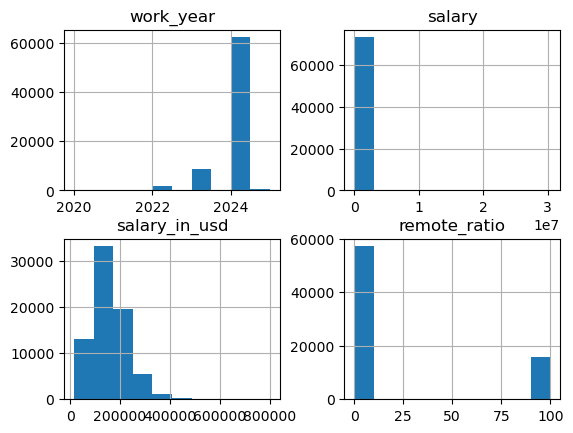

In [10]:
df_vacios_eliminados.hist()

#### 4.3 Gráfica de solo la columna de Año(Entrevista/Recolección)

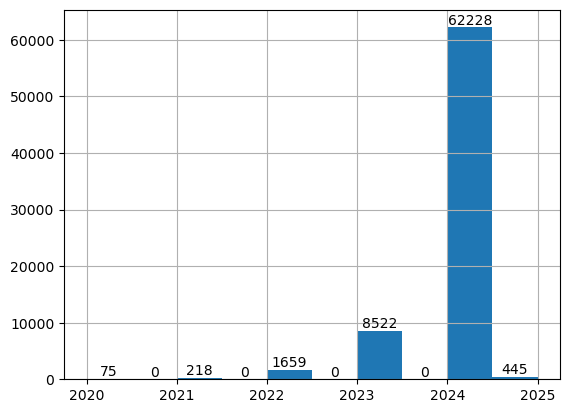

In [15]:
# Crear el histograma y guardar el objeto Axes
ax = df_vacios_eliminados['work_year'].hist()

# Obtener los contadores (heights) y las posiciones (bins)
counts, bins = np.histogram(df_vacios_eliminados['work_year'].dropna())

# Para colocar el texto, calculamos las posiciones centrales de cada barra
for count, x in zip(counts, 0.5 * (bins[:-1] + bins[1:])):
    ax.text(x, count, str(count), ha='center', va='bottom')

plt.show()

#### Graficando la columna por posición [0,1,2,3], si escogemos la posición [1] mostrará los datos de la columna "Salary"

#### 4.4 Creamos una gráfica de barras de agrupación de cada categoría de analisis

In [169]:
## Arreglo de las categorias a graficar 
analysis_categories= ['work_year','experience_level','employment_type','job_title','employee_residence','company_location','company_size']
# Configuración de color
def_color='blue'

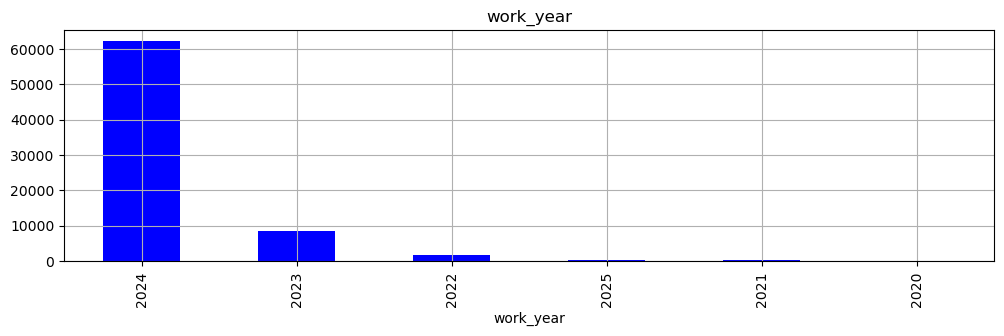

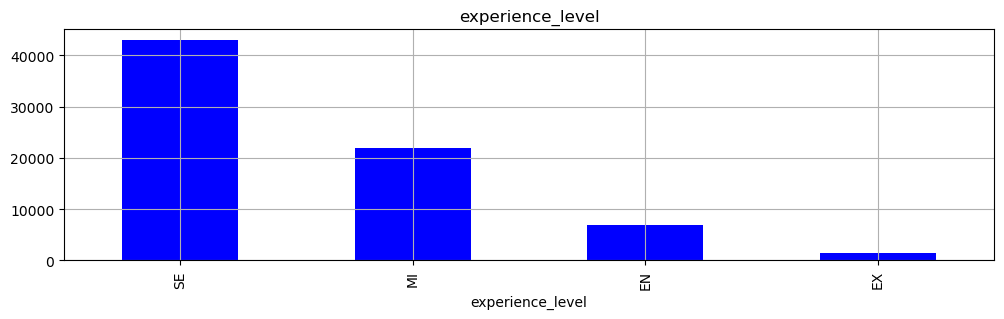

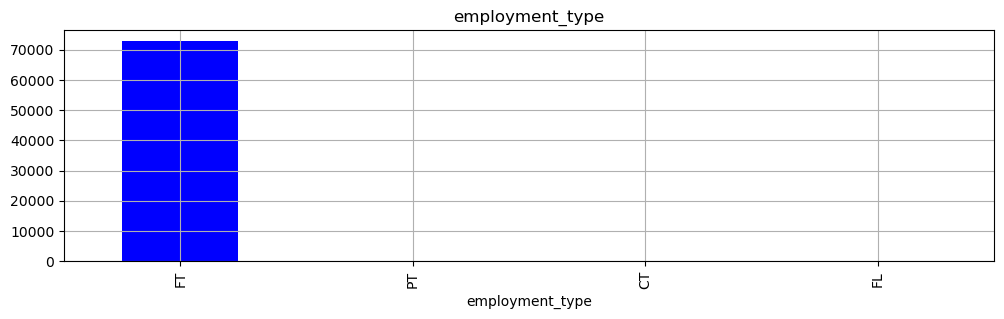

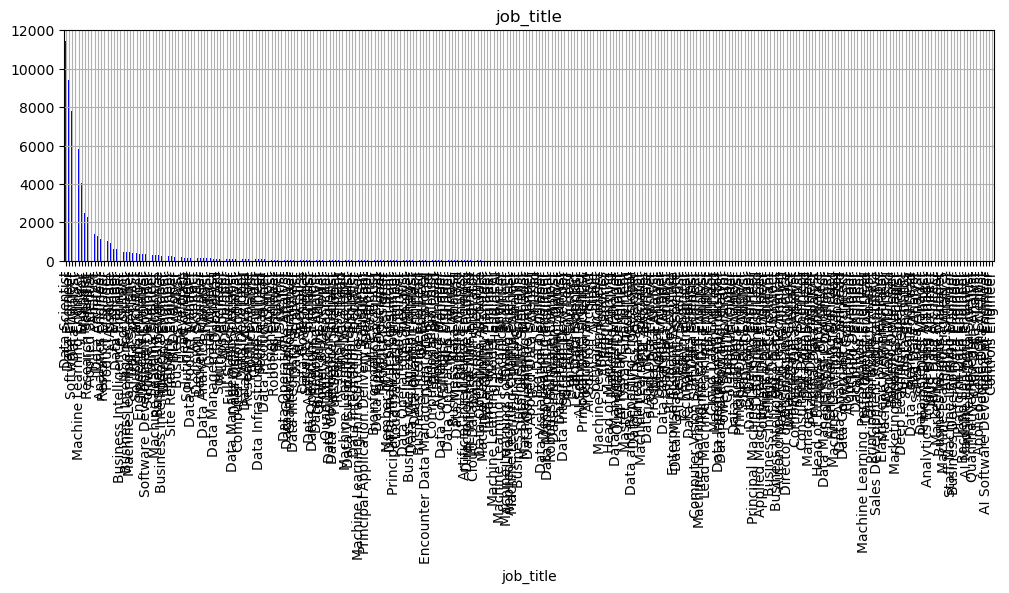

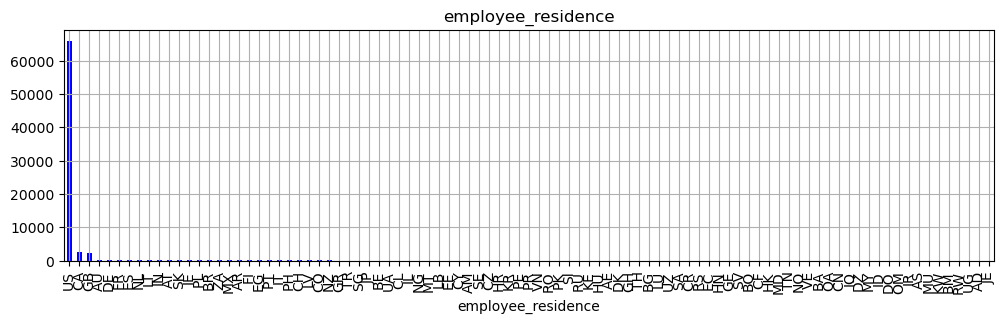

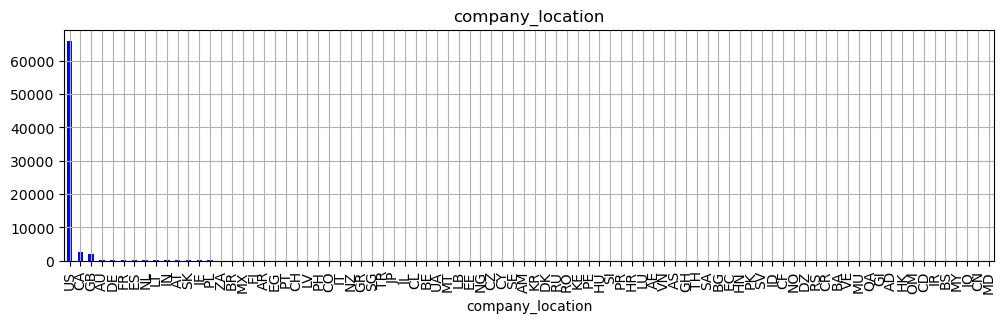

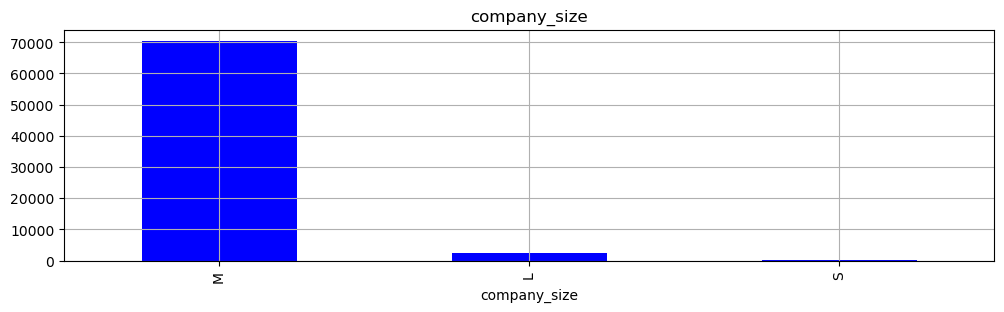

In [180]:
for f in analysis_categories:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar',color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

agrupar numeros de empleados que ganan entre 0 a 100 de 100-250 y + 250 ordenado por categoria


In [212]:
# Crear la columna de rango salarial
bins = [0, 100000, 250000, float('inf')] # Definir los límites de los rangos salariales para agrupar
labels = ['0-100K', '100K-250K', '250K+']
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)


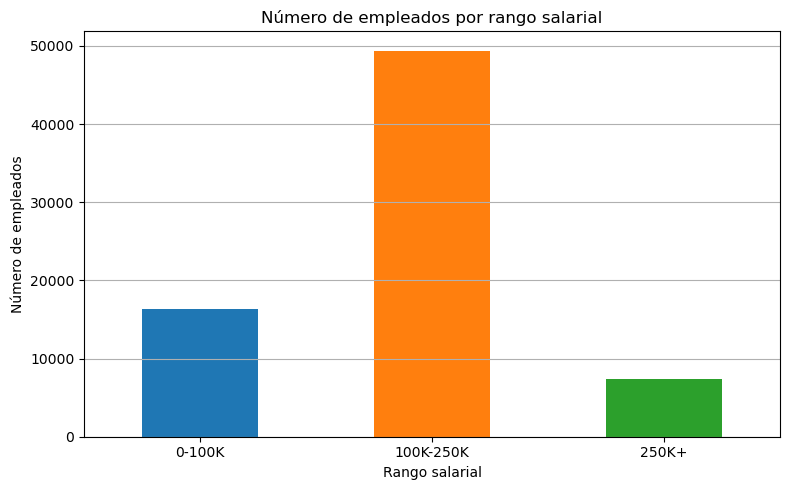

In [208]:
salary_counts = df_vacios_eliminados['salary_range'].value_counts().reindex(labels) # Contar cuántos empleados hay en cada rango salarial

plt.figure(figsize=(8,5)) # Crear una figura para graficar
salary_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c']) # Se usa un color diferente para cada barra para distinguir los rangos.
plt.title('Número de empleados por rango salarial') # Añadir título a la gráfica.
plt.ylabel('Número de empleados') # Etiqueta del eje Y (vertical).
plt.xlabel('Rango salarial') # Etiqueta del eje X (horizontal).
plt.grid(axis='y') # Mostrar una cuadrícula horizontal para facilitar la lectura de valores en Y.
plt.xticks(rotation=0) # Rotar las etiquetas del eje X
plt.tight_layout() # Ajustar el layout .
plt.show() # Mostrar la gráfica en pantalla.


# 5. Estadística Avanzada

##### Calcular la medidas de tendencia central, de nuestro DataFrame 

In [31]:
#Puse la instrucción como en la pagina de kaglee pero me salio así 
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df 

NameError: name 'calculate_statistics' is not defined

In [ ]:
stats_df= calculate_stadistics(df_vacios_eliminados)
def calculate_statistics(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    stat_names = [
        'Mean', 'Median', 'Mode', 'Range', 'Stdev', 'Variance', 'IQR',
        '25%', '50%', '75%', 'Min', 'Max', 'Skewness', 'Kurtosis'
    ]

    stats_table = []

    for stat in stat_names:
        row = []
        for col in numeric_cols:
            data = df[col].dropna()
            if stat == 'Mean':
                value = data.mean()
            elif stat == 'Median':
                value = data.median()
            elif stat == 'Mode':
                value = mode(data, keepdims=True).mode[0] if not data.empty else np.nan
            elif stat == 'Range':
                value = data.max() - data.min()
            elif stat == 'Stdev':
                value = data.std()
            elif stat == 'Variance':
                value = data.var()
            elif stat == 'IQR':
                value = data.quantile(0.75) - data.quantile(0.25)
            elif stat == '25%':
                value = data.quantile(0.25)
            elif stat == '50%':
                value = data.quantile(0.50)
            elif stat == '75%':
                value = data.quantile(0.75)
            elif stat == 'Min':
                value = data.min()
            elif stat == 'Max':
                value = data.max()
            elif stat == 'Skewness':
                value = skew(data)
            elif stat == 'Kurtosis':
                value = kurtosis(data)
            else:
                value = np.nan
            row.append(round(value, 2) if not pd.isnull(value) else np.nan)
        stats_table.append(row)

    stats_df = pd.DataFrame(stats_table, columns=numeric_cols, index=stat_names)
    return stats_df

# Uso:
# Asegúrate de tener tu DataFrame listo y sin valores nulos:
# df_vacios_eliminados = df.dropna()
stats_df = calculate_statistics(df_vacios_eliminados)

# Mostrar la tabla completa
print(stats_df)